In [27]:
#Importando librerias utiles
import numpy as npb
import matplotlib.legend
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [7]:
def distancia(vector):
    return np.sqrt(vector[:,0]**2 + vector[:,1]**2 + vector[:,2]**2)

In [28]:
v = np.array([[1,2,3],[4,5,6],[7,8,9]])
v1 = np.array([[1,1,1], [1,1,1]])
h = v1[0:] - v
print(h)

ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

In [26]:
r = np.random.rand(4,3)
print(r)
print(r[2:])

[[0.97651851 0.71352434 0.27884493]
 [0.78876769 0.90431658 0.74876323]
 [0.6262396  0.52108888 0.05140241]
 [0.17288634 0.85123185 0.49791313]]
[[0.6262396  0.52108888 0.05140241]
 [0.17288634 0.85123185 0.49791313]]


In [4]:
vec1 = np.array([[1,2,3], [3,4,5]])


51.92301994298868


In [9]:
#Definiendo la función calcular distancias
def distancia(x,y):
    s1 = (x[0]-y[0])**2
    s2 = (x[1]-y[1])**2
    s3 = (x[2]-y[2])**2
    return np.sqrt(s1 + s2 + s3)

In [10]:
def dist(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2)

In [11]:
#Importando datos
datos = np.loadtxt('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/data_10K.dat')
rand = np.loadtxt('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/rand0_10K.dat')
#longitud de la lista datos es la cantidad total de datos
N=len(datos)

In [12]:
#Definiendo numero de particiones y distancia de interés
n = 30
d_max = 180

In [13]:
#Creando archivo de Posiciones x (punto medio) e histogramas 
x=[]
DD=[]
DR=[]
RR=[]
for i in range(n):
    x.append((i+1/2)*d_max/n)
    DD.append(0)
    DR.append(0)
    RR.append(0)
#pasamos la lista x a un array 
x = np.array(x)
print(x)

[  3.   9.  15.  21.  27.  33.  39.  45.  51.  57.  63.  69.  75.  81.
  87.  93.  99. 105. 111. 117. 123. 129. 135. 141. 147. 153. 159. 165.
 171. 177.]


In [14]:
#Calculo de las distancias 
to=timer()
for i in range(N-1):
    for j in range(i+1,N):
        d_d=distancia(datos[i],datos[j])
        d_r=distancia(rand[i],rand[j])
        if d_d < d_max:
            DD[int(d_d*n/d_max)]+=2
        if d_r < d_max:
            RR[int(d_r*n/d_max)]+=2         
tf=timer()
print(tf-to)

517.3849740529986


In [15]:
to=timer()
for i in range(N):
    for j in range(N):
        d=distancia(datos[i],rand[j])
        if d<d_max:
            DR[int(d*n/d_max)]+=1
tf=timer()
print(tf-to)

522.1994482139999


In [16]:
#Construyendo los estimadores 
DD=np.array(DD)
DR=np.array(DR)
RR=np.array(RR)
LS=(DD-2*DR+RR)/RR
HAM=(DD*RR)/(DR**2)-1

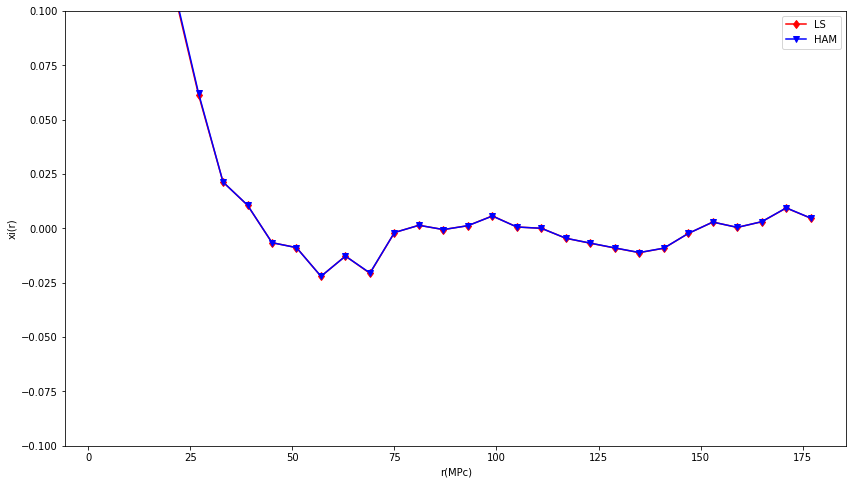

In [17]:
#Graficando
figura = matplotlib.pyplot.gcf()
plt.plot(x,LS,linestyle='-',color='r',marker='d',label='LS')
plt.plot(x,HAM,linestyle='-',color='b',marker='v',label='HAM')
plt.xlabel('r(MPc)')
plt.ylabel('xi(r)')
figura.set_size_inches(14,8)
#graficando solo en el rango de -1 a 1
plt.ylim(-.1,.1)
plt.legend()
plt.savefig('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/grafica10K.png',bbox_inches='tight')
plt.show() 

In [12]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
#%matplotlib inline

In [13]:
data  = pd.read_csv('data.dat', sep = ' ', header=None)
rand0 = pd.read_csv('rand0.dat',sep = ' ', header=None)

número de datos:  32768
número de datos random:  32768


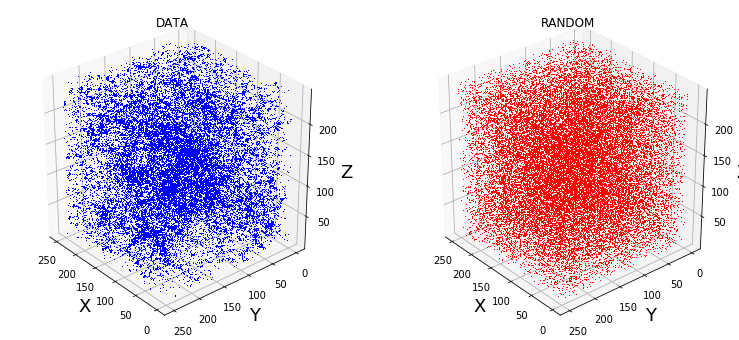

In [14]:
print('número de datos: ', len(data[0]))
print('número de datos random: ', len(rand0[0]))

fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(data[0],data[1],data[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(30, 140)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot3D(rand0[0],rand0[1],rand0[2],',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('RANDOM')
ax.view_init(30, 140)

plt.show()

In [15]:
# Pasamos los datos a un array numpy
data = np.array(data.T[0:3].T)
rand = np.array(rand0.T[0:3].T)

In [16]:
#FUNCIÓN DE PARA HACER HISTOGRAMAS 
def Histos(p,p_r,bn,point_max):
    """ 
    Función para construir los histogramas 
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    #Inicializamos los arreglos de los histogramas
    NDD = np.zeros(bn)
    NRR = np.zeros(bn)
    NDR = np.zeros(bn)
    
    n = 0
    
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        # Histogramas para DD
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NDD = NDD + 2*dis
        
        # Histogramas para RR
        s = jj-p_r[n:]
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NRR = NRR + 2*dis   
    
    for ii in p:
        # Histogramas para DR
        s = ii-p_r
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NDR = NDR + dis
    
    return r, NDD, NRR, NDR

In [17]:
#Función de correlación Landy-Szalay
def estim_LS(NDD, NRR, NDR):
    return (NDD - 2*NDR + NRR)/NRR

In [18]:
#Función de correlación de Hamilton
def estim_HAM(NDD, NRR, NDR):
    return (NDD*NRR/NDR**2) - 1


In [19]:
start = time.perf_counter()

bins = 30
r, NDD, NRR, NDR = Histos(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 57.45 segundos


In [20]:
eps_LS = estim_LS(NDD, NRR, NDR)
eps_HAM = estim_HAM(NDD, NRR, NDR)

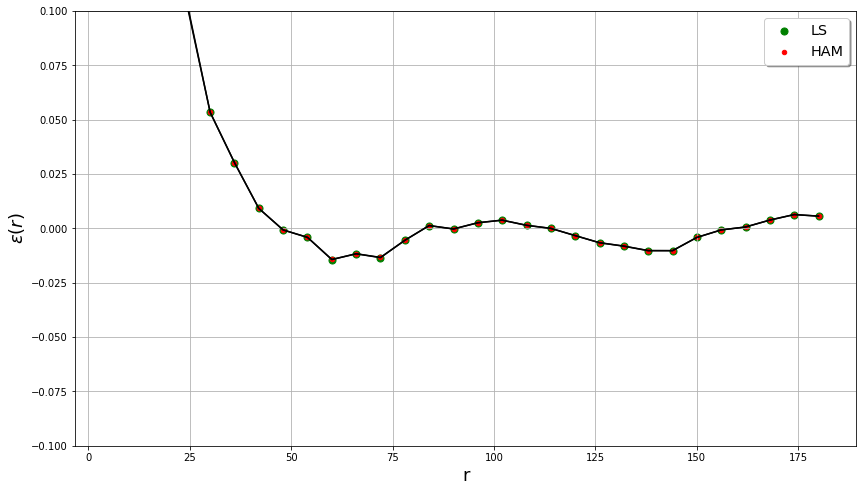

In [21]:
fig = plt.figure(figsize=(14,8))
plt.scatter(r[1:],eps_LS, s=50, c='g',label='LS')
plt.scatter(r[1:],eps_HAM, s=20, c='r',label='HAM')
plt.plot(r[1:],eps_LS,'k-')
plt.plot(r[1:],eps_HAM,'k-')
plt.ylim(-0.1,0.1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

In [23]:
V1 =  np.array([[130,125,137],[136,136,137]])
n = np.array([120,125,136])
m = V1 - n
munit = (m.T / np.sqrt(m[:,0]**2 + m[:,1]**2 + m[:,2]**2)).T
#print(m)
print(munit)

rab = np.array([[1,1,1],[2,2,2]])

matrix = np.multiply(rab,munit)
print(matrix)

r_pll = matrix[:,0] +matrix[:,1] + matrix[:,2]

print(r_pll)

[[0.99503719 0.         0.09950372]
 [0.8229512  0.56577895 0.05143445]]
[[0.99503719 0.         0.09950372]
 [1.6459024  1.1315579  0.1028689 ]]
[1.09454091 2.8803292 ]
